In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import missingno as msno
import statistics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
EdStatsCountrySeries = pd.read_csv("/content/drive/MyDrive/EdStatsCountry-Series.csv")
EdStatsCountrySeries.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [4]:
EdStatsCountry = pd.read_csv(r"/content/drive/MyDrive/EdStatsCountry.csv")
EdStatsCountry.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [5]:
EdStatsData = pd.read_csv(r"/content/drive/MyDrive/EdStatsData.csv",engine='python')
EdStatsData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
EdStatsSeries = pd.read_csv(r"/content/drive/MyDrive/EdStatsSeries.csv")
EdStatsSeries.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
EdStatsFootNote = pd.read_csv(r"/content/drive/MyDrive/EdStatsFootNote.csv")
EdStatsFootNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [8]:
EdStatsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [9]:
EdStatsSeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [10]:
EdStatsCountry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [11]:
EdStatsCountrySeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [12]:
EdStatsFootNote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [13]:
EdStatsData.loc[EdStatsData[['Country Name', 'Indicator Code']].duplicated(keep=False),:]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69


In [14]:
EdStatsSeries.loc[EdStatsSeries[['Series Code']].duplicated(keep=False),:]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20


In [15]:
EdStatsCountry.loc[EdStatsCountry[['Country Code']].duplicated(keep=False),:]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31


In [16]:
EdStatsCountrySeries.loc[EdStatsCountrySeries[['CountryCode','SeriesCode']].duplicated(keep=False),:]

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3


In [17]:
EdStatsFootNote.loc[EdStatsFootNote[['CountryCode','SeriesCode','Year']].duplicated(keep=False),:]

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4


To show that there is no duplicated data

In [18]:
nb_na = EdStatsData.isnull().sum()
nb_na[nb_na>0]

1970           814642
1971           851393
1972           851311
1973           851385
1974           851200
                ...  
2085           835494
2090           835494
2095           835494
2100           835494
Unnamed: 69    886930
Length: 66, dtype: int64

In [67]:
nb_na = EdStatsSeries.isnull().sum()
nb_na[nb_na>0]

Short definition                       1509
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64

In [20]:
nb_na = EdStatsCountry.isnull().sum()
nb_na[nb_na>0]

2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                                       96
Balance of Payments Manual in use                     60
External debt Reporting status                       117
System of trade                                       41
Government Accounting concept  

In [21]:
nb_na = EdStatsCountrySeries.isnull().sum()
nb_na[nb_na>0]

Unnamed: 3    613
dtype: int64

In [22]:
nb_na = EdStatsFootNote.isnull().sum()
nb_na[nb_na>0]

Unnamed: 4    643638
dtype: int64

An indication of the amount of missing data. I have decided to not use the Missingno toolbox, because our data set is very large.

In [23]:
EdStatsData.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,8.912200e+04,3.877700e+04,3.751100e+04,3.846000e+04,3.860600e+04,9.029600e+04,3.937200e+04,3.864100e+04,3.855200e+04,3.754000e+04,1.244050e+05,7.443700e+04,7.554300e+04,7.579300e+04,7.746200e+04,1.313610e+05,7.680700e+04,7.345300e+04,8.491400e+04,1.188390e+05,1.766760e+05,1.235090e+05,1.242050e+05,1.303630e+05,1.288140e+05,1.841080e+05,1.403120e+05,1.372720e+05,1.343870e+05,1.421080e+05,2.424420e+05,1.460120e+05,1.472640e+05,1.375090e+05,1.137890e+05,1.310580e+05,1.646000e+04,143.000000,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,3.283898e+09,7.664969e+09,7.913722e+09,7.856908e+09,8.118002e+09,3.622763e+09,9.156550e+09,1.014901e+10,1.104709e+10,1.195436e+10,9.084424e+09,1.571674e+10,1.604668e+10,1.643532e+10,1.684022e+10,1.052543e+10,1.874630e+10,2.027385e+10,1.794678e+10,1.331558e+10,9.423384e+09,1.384867e+10,1.428299e+10,1.449393e+10,1.589729e+10,1.188637e+10,1.684674e+10,1.872300e+10,2.029794e+10,1.894907e+10,1.189592e+10,2.117911e+10,2.176323e+10,2.425332e+10,2.678449e+10,2.353720e+10,1.934411e+11,2.160839,5.780697e+02,6.054774e+02,6.315916e+02,6.556516e+02,6.751516e+02,6.911287e+02,7.040640e+02,7.145788e+02,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,1.780774e+11,2.744142e+11,2.790549e+11,2.823809e+11,2.940635e+11,2.002929e+11,3.264675e+11,3.535351e+11,3.804257e+11,4.014873e+11,3.665667e+11,4.881357e+11,5.012055e+11,5.121962e+11,5.292982e+11,4.285218e+11,5.812586e+11,6.142357e+11,5.859148e+11,5.153472e+11,4.442374e+11,5.449242e+11,5.622886e+11,5.803607e+11,6.278337e+11,5.576181e+11,6.851484e+11,7.465688e+11,7.944132e+11,7.623650e+11,6.218710e+11,8.555853e+11,8.833955e+11,9.513016e+11,1.023180e+12,9.732465e+11,2.839188e+12,0.810584,1.475072e+04,1.577305e+04,1.678556e+04,1.778666e+04,1.874408e+04,1.965409e+04,2.052941e+04,2.136851e+04,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,-1.404240e+00,-1.478345e+00,-2.358765e+00,-2.867273e+00,-2.800548e+00,-2.216315e+00,-1.556722e+00,-1.410886e+00,-1.425202e+00,-1.562425e+00,-1.803750e+00,-5.814339e+00,-5.089333e+00,-6.184857e+00,-4.792691e+00,-2.697722e+00,-3.820174e+00,-2.517245e+00,-6.086200e+04,-6.526000e+04,-6.759300e+04,-6.973700e+04,-9.214300e+04,-1.111860e+05,-1.262600e+05,-1.347240e+05,-3.708940e+05,-3.882170e+05,-4.088540e+05,-4.561240e+05,-4.969050e+05,-5.709940e+05,-6.049930e+05,-6.157480e+05,-8.900000e+01,-2.467847e+00,-1.797539e+00,1.000000,-1.870000e+00,-2.000000e+00,-2.110000e+00,-2.150000e+00,-2.140000e+00,-2.090000e+00,-1.980000e+00,-1.830000e+00,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,1.770000e+00,9.468690e+00,9.989330e+00,9.581825e+00,9.068048e+0

EdStatsData has 886,930 rows and 70 columns, 886,930/3665 = 242. Therefore no duplicate data present
EdStatsSeries has 3,665 rows and 21 columns
EdStatsCountry has 241 rows and 32 columns
EdStatsCountrySeries has 613 rows and 4 columns
EdStatsFootNote has 643,638 rows and 5 columns

The data set describes 886930 rows in total. Of these there are 3665 different indicators for each of the 242 countries.

In [24]:
pd.set_option("display.max_rows", None)
Indicators = EdStatsData.value_counts('Indicator Name')
print(Indicators)

Indicator Name
Adjusted net enrolment rate, lower secondary, both sexes (%)                                                                                                            242
Population, ages 10-18, female                                                                                                                                          242
Population, ages 10-18, total                                                                                                                                           242
Population, ages 11-15, female                                                                                                                                          242
Population, ages 11-15, male                                                                                                                                            242
Population, ages 11-15, total                                                                                                

In [25]:
Region_Data = EdStatsCountry[["Region", "Table Name"]]


In [26]:
Region_Data.rename(columns = {'Table Name':'Country Name'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
Internet_users = EdStatsData.loc[EdStatsData['Indicator Name'] == 'Internet users (per 100 people)']

In [28]:
Target_Population = EdStatsData.loc[EdStatsData['Indicator Name'] == 'Population, ages 15-24, total']

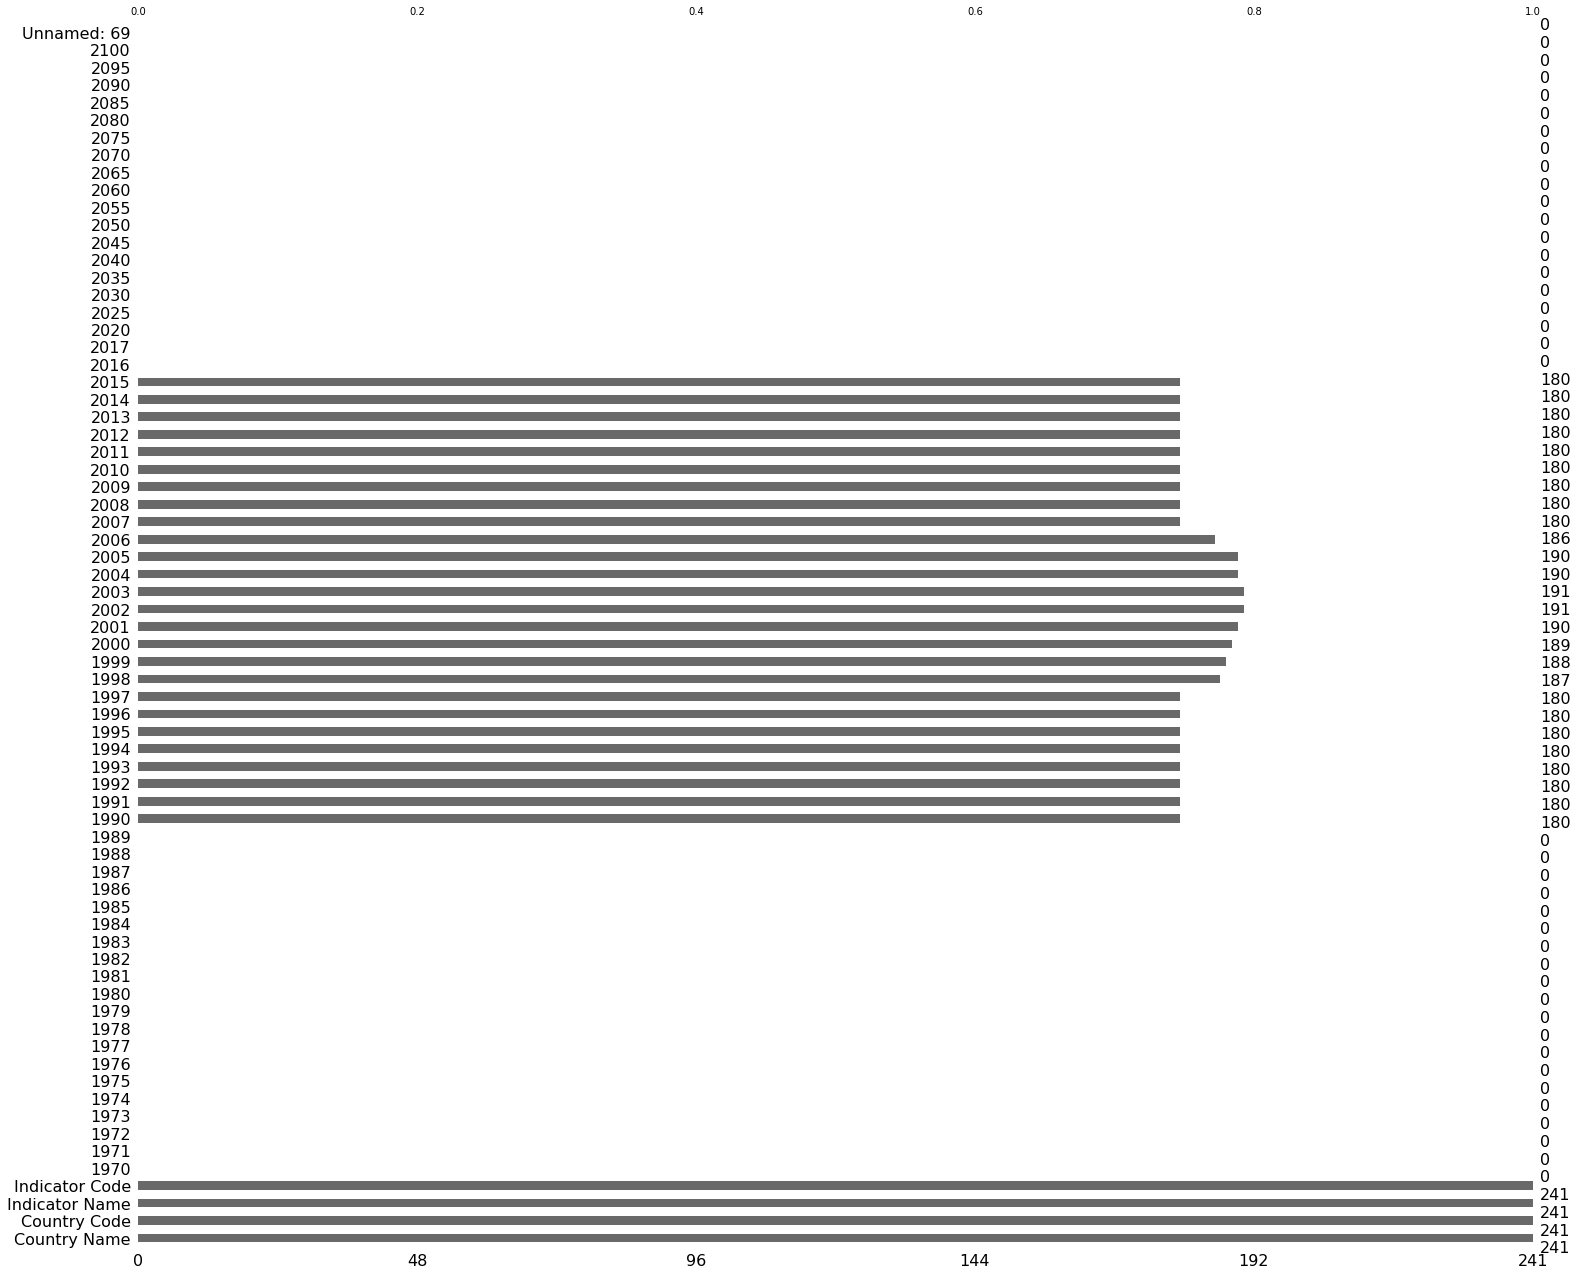

In [29]:

msno.bar(Target_Population.sample(241))

Zero values in our data set for the total population aged between 15 and 24.

In [30]:
Internet_Users_2015 = Internet_users[["Country Name", "2015"]]

In [31]:
Target_Population1 = pd.merge(Region_Data, Target_Population, how="left")

In [32]:
Target_Population_in_2015 = Target_Population1[["Country Name", "Region", "2015"]]

In [33]:
Target_Population_in_2015.rename(columns = {'2015':'Target Population in 2015'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
Target_Population_in_2015.head()

,Country Name,Region,Target Population in 2015
0,Aruba,Latin America & Caribbean,14455.0
1,Afghanistan,South Asia,7252785.0
2,Angola,Sub-Saharan Africa,4259352.0
3,Albania,Europe & Central Asia,556269.0
4,Andorra,Europe & Central Asia,NaN


In [35]:
Target_Population_in_2015_with_Internet = pd.merge(Target_Population_in_2015, Internet_Users_2015, how="right")

In [36]:
Target_Population_in_2015_with_Internet.rename(columns = {'2015':'Internet Users in 2015'}, inplace = True)

In [37]:
Target_Population_in_2015_with_Internet['Addressable Market'] = Target_Population_in_2015_with_Internet['Target Population in 2015'] * 0.01 * Target_Population_in_2015_with_Internet['Internet Users in 2015']

In [38]:
Target_Population_in_2015_with_Internet.sort_values("Addressable Market", ascending = False) 

,Country Name,Region,Target Population in 2015,Internet Users in 2015,Addressable Market
66,China,East Asia & Pacific,197026759.0,50.300000,9.910446e+07
113,India,South Asia,244120201.0,26.000000,6.347125e+07
231,United States,North America,45147517.0,74.554202,3.365937e+07
51,Brazil,Latin America & Caribbean,33595574.0,58.327952,1.959561e+07
152,Mexico,Latin America & Caribbean,20336734.0,57.431043,1.167960e+07
122,Japan,East Asia & Pacific,12157426.0,91.058028,1.107031e+07
185,Russian Federation,Europe & Central Asia,14661984.0,73.410000,1.076336e+07
179,Philippines,East Asia & Pacific,19278458.0,53.700000,1.035253e+07
114,Indonesia,East Asia & Pacific,41819264.0,21.976068,9.190230e+06
169,Nigeria,Sub-Saharan Africa,36659023.0,24.500000,8.981461e+06


In [39]:
Cleaned_Target_Population_in_2015_with_Internet = Target_Population_in_2015_with_Internet.dropna()

In [40]:
Top_countries = Target_Population_in_2015_with_Internet.nlargest(10, 'Addressable Market')['Country Name']
Top_10_countries = pd.merge(Top_countries, Target_Population_in_2015_with_Internet, how="left")

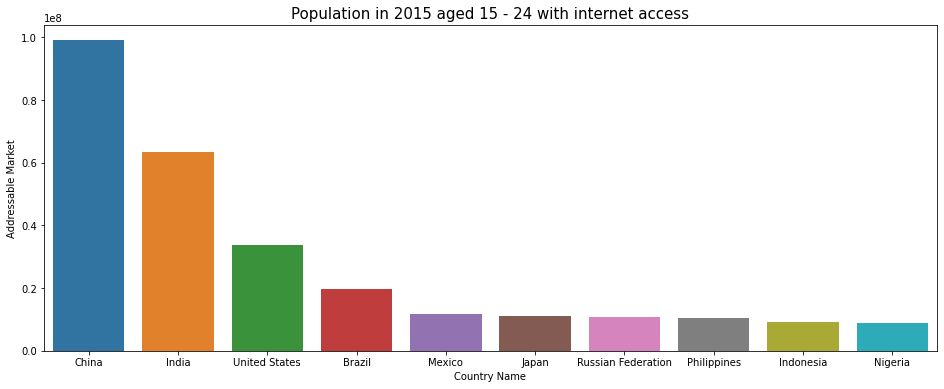

In [41]:
x = Top_10_countries['Country Name']
y = Top_10_countries['Addressable Market']

plt.figure(figsize=(16, 6))
plt.title('Population in 2015 aged 15 - 24 with internet access', size=15)
plot = sns.barplot(x = x, 
                   y = y)
plt.show()





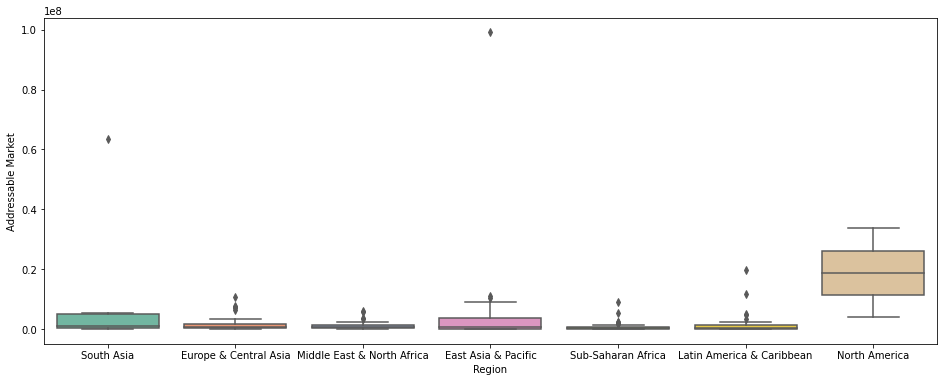

In [42]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='Region', y='Addressable Market',data = Target_Population_in_2015_with_Internet,palette='Set2')
plt.show()

A plot of countries with a high potential of customers for our services. As a priority we should operate in China.

In [43]:
Population_Change = EdStatsData.loc[EdStatsData['Indicator Name'] == 'Population growth (annual %)']
#pd.set_option("display.max_columns", None)
Population_Change.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
2307,Arab World,ARB,Population growth (annual %),SP.POP.GROW,2.767219,2.694623,2.658899,2.687857,2.795847,2.948191,3.106885,3.228207,3.288608,3.272429,3.205090,3.128342,3.062971,2.997669,2.914810,2.901453,2.851010,2.765726,2.697355,2.615089,3.541847,2.701009,1.746289,2.581814,2.465317,2.973166,2.166865,2.081693,2.019946,2.016759,2.077299,2.137064,2.182727,2.214497,2.272483,2.311472,2.356627,2.386344,2.381136,2.323576,2.230786,2.128048,2.063874,2.012570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5972,East Asia & Pacific,EAS,Population growth (annual %),SP.POP.GROW,2.596915,2.607611,2.406704,2.235552,2.175313,1.920086,1.683802,1.565171,1.533044,1.535820,1.479731,1.502066,1.618393,1.588521,1.488160,1.507874,1.587679,1.650176,1.639294,1.576549,1.498695,1.418873,1.307038,1.242380,1.227515,1.202953,1.171070,1.133587,1.083361,1.005269,0.947782,0.905178,0.849844,0.804134,0.772450,0.756093,0.741996,0.707903,0.712832,0.688428,0.675724,0.668431,0.678831,0.676462,0.681871,0.675463,0.683098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9637,East Asia & Pacific (excluding high income),EAP,Population growth (annual %),SP.POP.GROW,2.760758,2.748968,2.528034,2.388155,2.208198,1.963139,1.776944,1.620288,1.590470,1.586029,1.532586,1.552214,1.692215,1.670978,1.571306,1.604355,1.695766,1.774220,1.763592,1.689956,1.606679,1.512764,1.394399,1.324942,1.300066,1.261033,1.226744,1.201504,1.148577,1.073279,1.003323,0.949251,0.898095,0.857510,0.830134,0.815590,0.782519,0.747518,0.734261,0.722499,0.713743,0.714412,0.721732,0.723835,0.726614,0.718663,0.730576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13302,Euro area,EMU,Population growth (annual %),SP.POP.GROW,0.546132,0.562353,0.694797,0.660072,0.589718,0.527776,0.448375,0.391704,0.391761,0.397129,0.419633,0.375435,0.268657,0.199128,0.167989,0.192016,0.254392,0.283938,0.343726,0.438648,0.470723,0.375055,0.464942,0.409676,0.290912,0.257508,0.259020,0.238597,0.210887,0.258242,0.328449,0.385015,0.489061,0.543192,0.551281,0.518157,0.468263,0.520479,0.489880,0.324929,0.235744,-0.215869,0.221052,0.336016,0.335839,0.321947,0.405101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16967,Europe & Central Asia,ECS,Population growth (annual %),SP.POP.GROW,0.768835,0.766891,0.834905,0.807145,0.771744,0.739299,0.717517,0.680159,0.668832,0.667204,0.686331,0.664811,0.595296,0.566158,0.588313,0.598256,0.612137,0.614554,0.615958,0.617723,0.523060,0.395066,0.411080,0.365473,0.229964,0.190682,0.151788,0.170235,0.130788,0.132959,0.107267,0.152098,0.183096,0.261303,0.296625,0.302387,0.307291,0.356747,0.398402,0.411113,0.386694,0.233825,0.400822,0.468157,0.471662,0.479481,0.503675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
Cleaned_Population_Change = Population_Change.fillna(method='ffill', axis=1)

In [45]:
Evolution_of_Population = pd.merge(Cleaned_Target_Population_in_2015_with_Internet, Cleaned_Population_Change, how="left")

In [46]:
Population_Change_2015 = Evolution_of_Population[["Country Name", "Region", "Target Population in 2015", "Internet Users in 2015", "Addressable Market"]]

In [47]:
Evolution_of_Population_sorted = Evolution_of_Population.sort_values("Addressable Market", ascending = False)

In [48]:
Evolution_of_Population_sorted.head()

,Country Name,Region,Target Population in 2015,Internet Users in 2015,Addressable Market,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
34,China,East Asia & Pacific,197026759.0,50.300000,9.910446e+07,CHN,Population growth (annual %),SP.POP.GROW,2.761676,2.746916,2.457357,2.283395,2.065955,1.766392,1.547338,1.362779,1.338182,1.333928,1.254221,1.280952,1.472675,1.44495,1.312069,1.361699,1.487399,1.603605,1.610071,1.53317,1.467303,1.364434,1.225536,1.149619,1.130261,1.086509,1.048142,1.02345,0.95955,0.865851,0.787957,0.726381,0.67,0.622861,0.593933,0.588125,0.558374,0.522272,0.512387,0.497381,0.48296,0.47915,0.487231,0.49371,0.506312,0.508137,0.541479,0.541479,0.541479,0.541479,0.541479,0.541479,0.541479,0.541479,0.541479,0.541479,0.541479,0.541479,0.541479,0.541479,0.541479,0.541479,0.541479,0.541479,0.541479,0.541479
73,India,South Asia,244120201.0,26.000000,6.347125e+07,IND,Population growth (annual %),SP.POP.GROW,2.205115,2.25876,2.302176,2.328081,2.331782,2.320525,2.302276,2.287869,2.282379,2.289659,2.303611,2.317218,2.321676,2.313329,2.289168,2.253972,2.21596,2.179738,2.143457,2.108347,2.074321,2.038691,2.002906,1.971204,1.944743,1.921399,1.898649,1.873466,1.844585,1.810832,1.773546,1.734729,1.696185,1.6581,1.621038,1.584252,1.548886,1.512078,1.469688,1.420203,1.366798,1.311876,1.261206,1.219419,1.189328,1.167527,1.148215,1.148215,1.148215,1.148215,1.148215,1.148215,1.148215,1.148215,1.148215,1.148215,1.148215,1.148215,1.148215,1.148215,1.148215,1.148215,1.148215,1.148215,1.148215,1.148215
168,United States,North America,45147517.0,74.554202,3.365937e+07,USA,Population growth (annual %),SP.POP.GROW,1.165003,1.264334,1.070523,0.954477,0.91366,0.985986,0.95022,1.005772,1.059573,1.103577,0.95959,0.981415,0.953318,0.914379,0.865817,0.886129,0.924164,0.893829,0.907999,0.944406,1.129651,1.336261,1.386886,1.31868,1.226296,1.190787,1.163412,1.20396,1.165715,1.14834,1.112769,0.989741,0.927797,0.859482,0.925484,0.921713,0.964254,0.951055,0.945865,0.876651,0.836422,0.745614,0.74642,0.700262,0.743124,0.729732,0.692801,0.692801,0.692801,0.692801,0.692801,0.692801,0.692801,0.692801,0.692801,0.692801,0.692801,0.692801,0.692801,0.692801,0.692801,0.692801,0.692801,0.692801,0.692801,0.692801
22,Brazil,Latin America & Caribbean,33595574.0,58.327952,1.959561e+07,BRA,Population growth (annual %),SP.POP.GROW,2.540982,2.488703,2.440719,2.407955,2.393609,2.391232,2.388251,2.380221,2.372495,2.364126,2.352599,2.342078,2.324176,2.285627,2.222057,2.142237,2.059469,1.983119,1.912636,1.851101,1.797189,1.74195,1.688364,1.648051,1.623858,1.609647,1.599432,1.583303,1.554875,1.509727,1.452901,1.395386,1.341367,1.285685,1.228873,1.172552,1.114609,1.060019,1.016865,0.988454,0.970296,0.956013,0.93892,0.917023,0.887563,0.852799,0.817556,0.817556,0.817556,0.817556,0.817556,0.817556,0.817556,0.817556,0.817556,0.817556,0.817556,0.817556,0.817556,0.817556,0.817556,0.817556,0.817556,0.817556,0.817556,0.817556
106,Mexico,Latin America & Caribbean,20336734.0,57.431043,1.167960e+07,MEX,Population growth (annual %),SP.POP.GROW,3.136084,3.194381,3.222765,3.19725,3.106935,2.974873,2.836495,2.712816,2.59799,2.497642,2.40936,2.324705,2.242987,2.171782,2.112476,2.06366,2.013465,1.968145,1.944703,1.947165,1.963892,1.987706,1.997565,1.975381,1.911726,1.820308,1.730762,1.652412,1.570345,1.485672,1.404926,1.31592,1.242445,1.2237,1.274618,1.370662,1.482564,1.571679,1.619085,1.608834,1.558042,1.498344,1.449093,1.403402,1.366246,1.334898,1.301731,1.301731,1.301731,1.301731,1.301731,1.301731,1.301731,1.301731,1.301731,1.301731,1.301731,1.301731,1.301731,1.301731,1.301731,1.301731,1.301731,1.301731,1.301731,1.301731


In [49]:
No_of_Regions = Target_Population_in_2015_with_Internet.value_counts('Region')
print(No_of_Regions)

Region
Europe & Central Asia         56
Sub-Saharan Africa            46
Latin America & Caribbean     40
East Asia & Pacific           35
Middle East & North Africa    21
South Asia                     8
North America                  3
dtype: int64


In [50]:
Countries_in_Europe1 = Population_Change_2015.loc[Population_Change_2015['Region'] == 'Europe & Central Asia']
Countries_in_Europe = Countries_in_Europe1.sort_values("Addressable Market", ascending = False) 

Countries_in_Africa1 = Population_Change_2015.loc[Population_Change_2015['Region'] == 'Sub-Saharan Africa']
Countries_in_Africa = Countries_in_Africa1.sort_values("Addressable Market", ascending = False)

Countries_in_Latin_America1 = Population_Change_2015.loc[Population_Change_2015['Region'] == 'Latin America & Caribbean']
Countries_in_Latin_America = Countries_in_Latin_America1.sort_values("Addressable Market", ascending = False)

Countries_in_East_Asia1 = Population_Change_2015.loc[Population_Change_2015['Region'] == 'East Asia & Pacific']
Countries_in_East_Asia = Countries_in_East_Asia1.sort_values("Addressable Market", ascending = False)

Countries_in_Middle_East1 = Population_Change_2015.loc[Population_Change_2015['Region'] == 'Middle East & North Africa']
Countries_in_Middle_East = Countries_in_Middle_East1.sort_values("Addressable Market", ascending = False)

Countries_in_South_Asia1 = Population_Change_2015.loc[Population_Change_2015['Region'] == 'South Asia']
Countries_in_South_Asia = Countries_in_South_Asia1.sort_values("Addressable Market", ascending = False)

Countries_in_America1 = Population_Change_2015.loc[Population_Change_2015['Region'] == 'North America']
Countries_in_America = Countries_in_America1.sort_values("Addressable Market", ascending = False)

In [51]:
for cat in Population_Change_2015["Region"].unique():
    subset = Population_Change_2015.loc[Population_Change_2015.Region == cat, :]
    print('-'*20)
    print("The total addressable population in") 
    print(cat)
    print("in 2015 was:",subset['Addressable Market'].sum().astype(int))

--------------------
The total addressable population in
South Asia
in 2015 was: 76685966
--------------------
The total addressable population in
Europe & Central Asia
in 2015 was: 74648933
--------------------
The total addressable population in
Middle East & North Africa
in 2015 was: 31352118
--------------------
The total addressable population in
Sub-Saharan Africa
in 2015 was: 34047568
--------------------
The total addressable population in
Latin America & Caribbean
in 2015 was: 56952139
--------------------
The total addressable population in
East Asia & Pacific
in 2015 was: 157904387
--------------------
The total addressable population in
North America
in 2015 was: 37528616


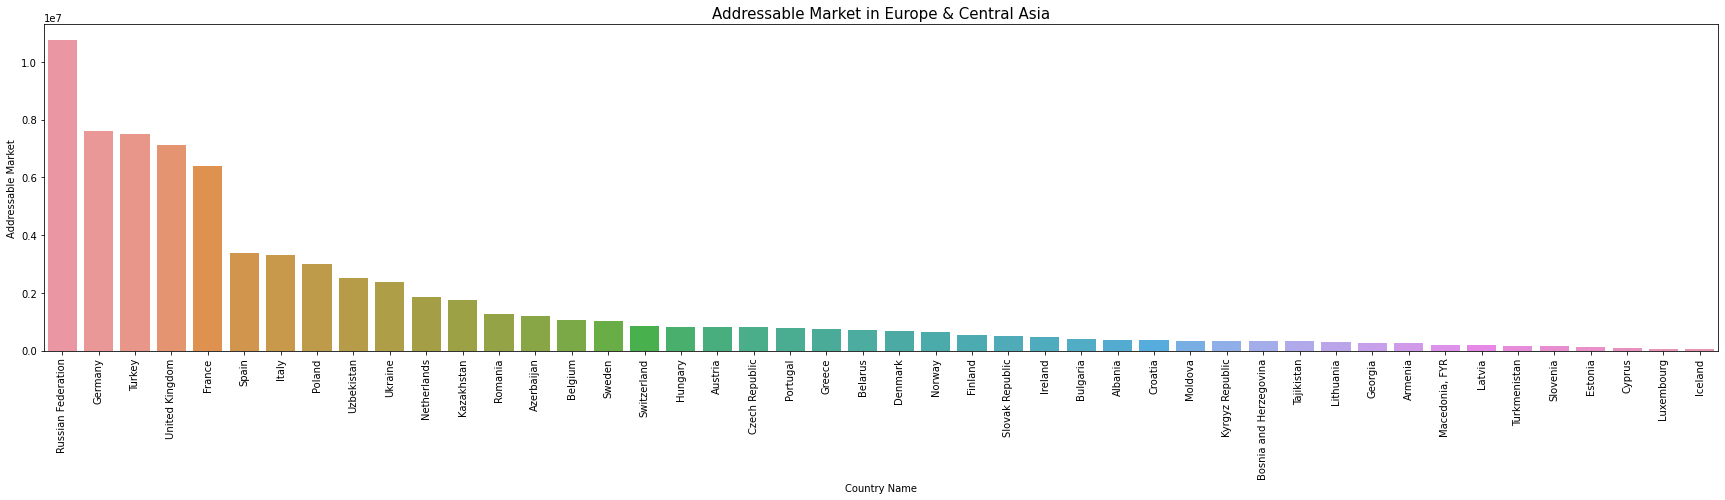

In [52]:
plt.figure(figsize=(30, 6))
plt.title('Addressable Market in Europe & Central Asia', size=15)
plot = sns.barplot(x = Countries_in_Europe['Country Name'], 
                   y = Countries_in_Europe['Addressable Market'])
plt.xticks(rotation=90)
plt.show()

In [53]:
Countries_in_Europe.describe()

,Target Population in 2015,Internet Users in 2015,Addressable Market
count,4.600000e+01,46.000000,4.600000e+01
mean,2.348418e+06,70.863335,1.622803e+06
std,3.379251e+06,19.175119,2.414711e+06
min,4.457000e+04,14.996775,4.376774e+04
25%,5.374702e+05,63.266356,3.169035e+05
50%,1.049138e+06,72.867350,7.027290e+05
75%,2.186868e+06,84.963300,1.621660e+06
max,1.466198e+07,98.200000,1.076336e+07


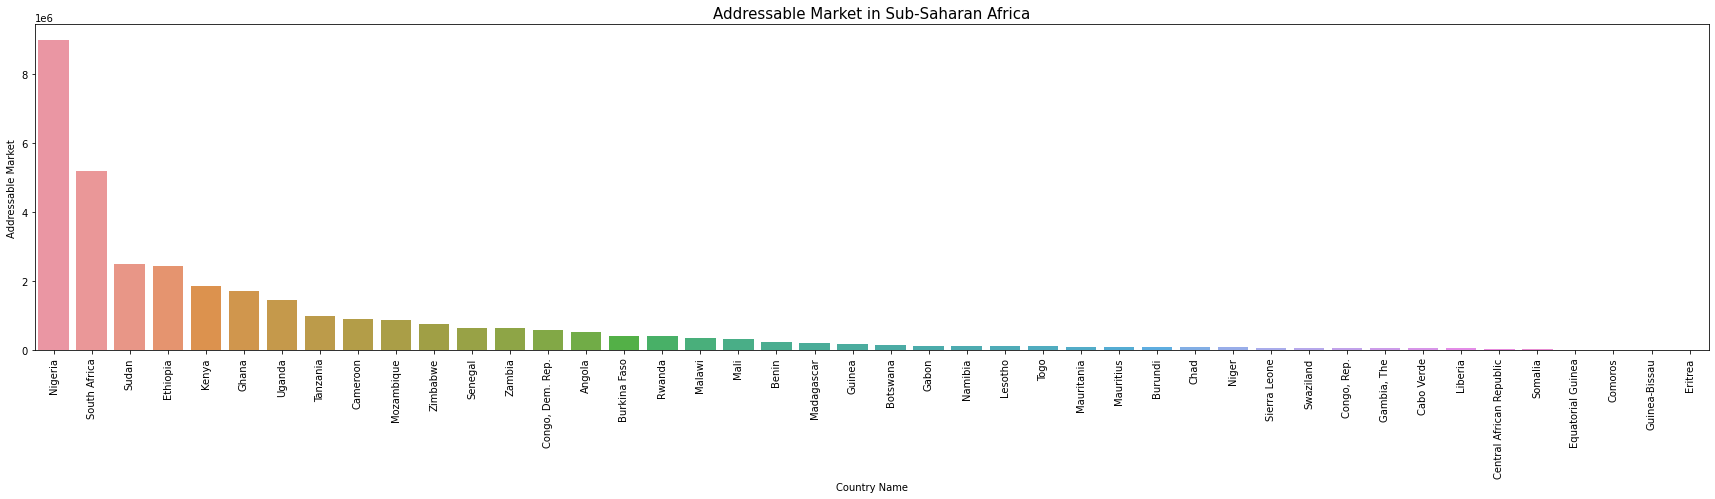

In [54]:
plt.figure(figsize=(30, 6))
plt.title('Addressable Market in Sub-Saharan Africa', size=15)
plot = sns.barplot(x = Countries_in_Africa['Country Name'], 
                   y = Countries_in_Africa['Addressable Market'])
plt.xticks(rotation=90)
plt.show()

In [55]:
Countries_in_Africa.describe()

,Target Population in 2015,Internet Users in 2015,Addressable Market
count,4.400000e+01,44.000000,4.400000e+01
mean,4.379915e+06,17.109685,7.738084e+05
std,6.576529e+06,13.460848,1.582309e+06
min,1.212990e+05,1.083733,1.266133e+04
25%,6.859662e+05,6.926105,8.141833e+04
50%,2.296726e+06,13.799563,1.733510e+05
75%,4.562571e+06,23.182114,6.791664e+05
max,3.665902e+07,51.919116,8.981461e+06


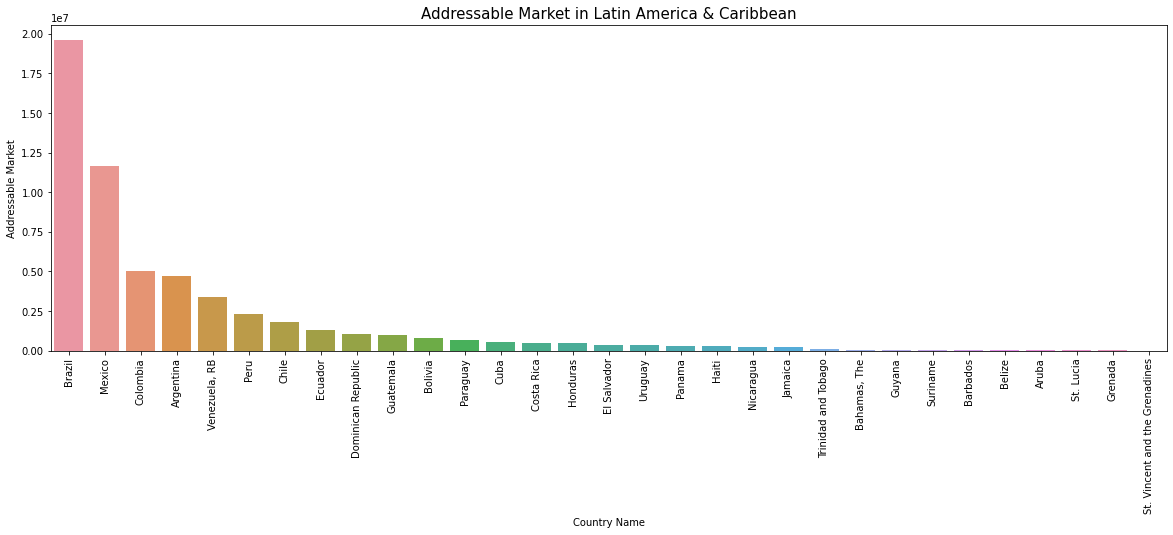

In [56]:
plt.figure(figsize=(20, 6))
plt.title('Addressable Market in Latin America & Caribbean', size=15)
plot = sns.barplot(x = Countries_in_Latin_America['Country Name'], 
                   y = Countries_in_Latin_America['Addressable Market'])
plt.xticks(rotation=90)
plt.show()

In [57]:
Countries_in_Latin_America.describe()

,Target Population in 2015,Internet Users in 2015,Addressable Market
count,3.100000e+01,31.000000,3.100000e+01
mean,3.436383e+06,49.760708,1.837166e+06
std,6.876221e+06,17.596419,4.038692e+06
min,1.445500e+04,12.197700,1.042751e+04
25%,1.069660e+05,39.102549,4.682270e+04
50%,1.363506e+06,51.205425,3.783499e+05
75%,2.757369e+06,60.816099,1.192029e+06
max,3.359557e+07,88.661227,1.959561e+07


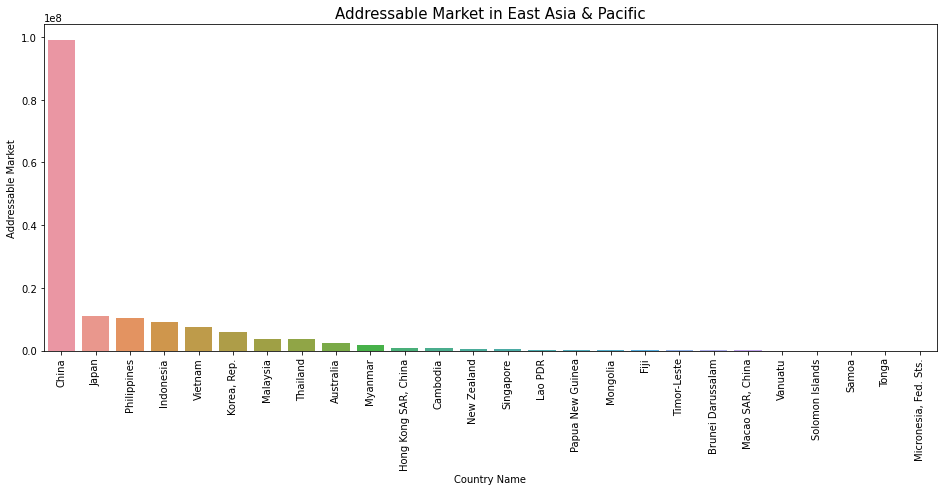

In [58]:
plt.figure(figsize=(16, 6))
plt.title('Addressable Market in East Asia & Pacific', size=15)
plot = sns.barplot(x = Countries_in_East_Asia['Country Name'], 
                   y = Countries_in_East_Asia['Addressable Market'])
plt.xticks(rotation=90)
plt.show()

In [59]:
Countries_in_East_Asia.describe()

,Target Population in 2015,Internet Users in 2015,Addressable Market
count,2.600000e+01,26.000000,2.600000e+01
mean,1.268931e+07,47.222341,6.073246e+06
std,3.870231e+07,28.264187,1.929081e+07
min,2.295600e+04,7.900000,7.972294e+03
25%,1.322755e+05,22.069902,5.835241e+04
50%,1.175232e+06,40.908063,5.396199e+05
75%,8.204253e+06,76.000099,3.741523e+06
max,1.970268e+08,91.058028,9.910446e+07


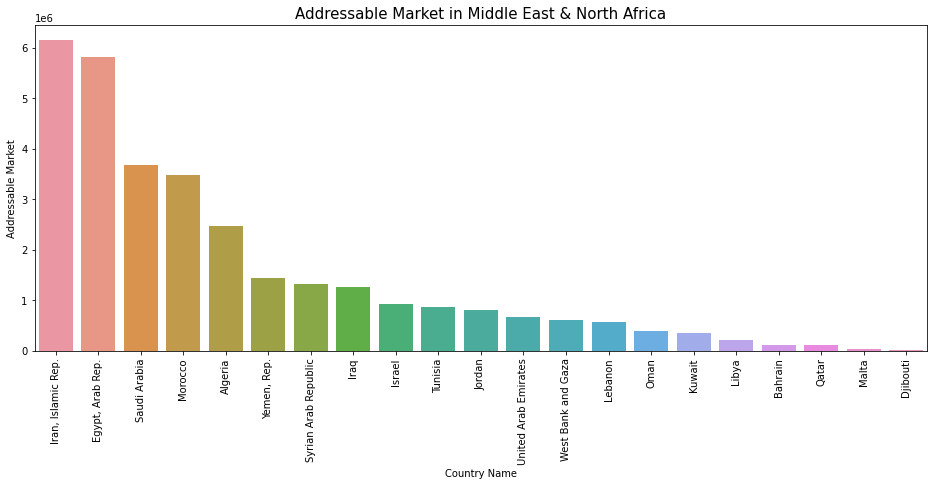

In [60]:
plt.figure(figsize=(16, 6))
plt.title('Addressable Market in Middle East & North Africa', size=15)
plot = sns.barplot(x = Countries_in_Middle_East['Country Name'], 
                   y = Countries_in_Middle_East['Addressable Market'])
plt.xticks(rotation=90)
plt.show()

In [61]:
Countries_in_Middle_East.describe()

,Target Population in 2015,Internet Users in 2015,Addressable Market
count,2.100000e+01,21.000000,2.100000e+01
mean,3.530033e+06,55.447096,1.492958e+06
std,4.389639e+06,25.724417,1.813470e+06
min,5.150400e+04,11.922431,2.356683e+04
25%,5.835650e+05,37.819383,3.594800e+05
50%,1.211599e+06,57.424192,8.001465e+05
75%,5.995687e+06,76.184000,1.444086e+06
max,1.537775e+07,93.478301,6.145871e+06


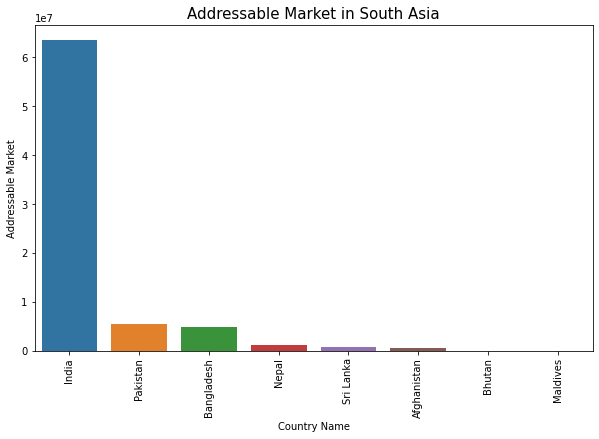

In [62]:
plt.figure(figsize=(10, 6))
plt.title('Addressable Market in South Asia', size=15)
plot = sns.barplot(x = Countries_in_South_Asia['Country Name'], 
                   y = Countries_in_South_Asia['Addressable Market'])
plt.xticks(rotation=90)
plt.show()

In [63]:
Countries_in_South_Asia.describe()

,Target Population in 2015,Internet Users in 2015,Addressable Market
count,8.000000e+00,8.000000,8.000000e+00
mean,4.185906e+07,25.561539,9.585746e+06
std,8.314867e+07,15.487468,2.187818e+07
min,6.998400e+04,8.260000,3.811465e+04
25%,2.277826e+06,14.300000,4.639807e+05
50%,7.032758e+06,21.790809,1.046919e+06
75%,3.557065e+07,32.441553,5.083093e+06
max,2.441202e+08,54.461955,6.347125e+07


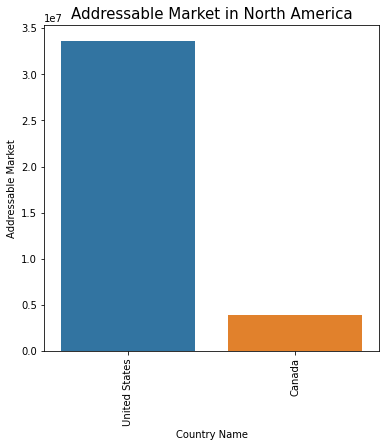

In [64]:
plt.figure(figsize=(6, 6))
plt.title('Addressable Market in North America', size=15)
plot = sns.barplot(x = Countries_in_America['Country Name'], 
                   y = Countries_in_America['Addressable Market'])
plt.xticks(rotation=90)
plt.show()

In [65]:
Countries_in_America.describe()


,Target Population in 2015,Internet Users in 2015,Addressable Market
count,2.000000e+00,2.000000,2.000000e+00
mean,2.476051e+07,81.512101,1.876431e+07
std,2.883158e+07,9.839955,2.106480e+07
min,4.373511e+06,74.554202,3.869245e+06
25%,1.456701e+07,78.033152,1.131678e+07
50%,2.476051e+07,81.512101,1.876431e+07
75%,3.495402e+07,84.991051,2.621184e+07
max,4.514752e+07,88.470000,3.365937e+07
